In [1]:
import numpy as np
import pandas as pd
from timeit import default_timer as timer
from tqdm.notebook import tqdm, trange
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
sns.set_palette('Set2')

In [2]:
from gurobipy import *

In [3]:
from CopyNumberDistanceFunctions import *

In [4]:
df = pd.read_pickle('outputs.pkl')

In [5]:
df['d(pS,T) - d(pS_,T)'] = df['d(pS,T)'] - df['d(pS_,T)']

In [6]:
df

,n,p,k,S,T,T_runs,cnt,"d(pS,T)",n2_time,S_,"d(pS_,T)","d(S_,S)","d(pS,T) - d(pS_,T)"
0,100,2,5,"[5, 2, 1, 5, 4, 1, 5, 2, 2, 2, 5, 3, 3, 1, 4, ...","[10, 4, 2, 10, 8, 2, 10, 4, 4, 3, 10, 6, 8, 4,...",4,"[(31, 94, -1), (13, 97, 1), (52, 55, -1), (11,...",5,0.000116,"[5.0, 2.0, 1.0, 5.0, 4.0, 1.0, 5.0, 2.0, 2.0, ...",4.0,3.0,1.0
1,100,2,5,"[4, 5, 1, 4, 4, 3, 1, 1, 1, 5, 3, 5, 4, 1, 4, ...","[8, 10, 2, 8, 8, 6, 1, 1, 1, 10, 6, 10, 8, 2, ...",5,"[(50, 53, 1), (35, 87, 1), (23, 25, -1), (7, 9...",5,0.000112,"[4.0, 5.0, 1.0, 4.0, 4.0, 3.0, 1.0, 1.0, 1.0, ...",5.0,2.0,0.0
2,100,2,5,"[2, 4, 5, 3, 5, 3, 5, 5, 5, 4, 2, 4, 1, 5, 2, ...","[4, 8, 10, 6, 9, 5, 9, 9, 9, 7, 3, 7, 1, 9, 3,...",3,"[(1, 96, 1), (1, 99, -1), (2, 51, 1), (2, 28, ...",3,0.000110,"[2.0, 4.0, 5.0, 3.0, 5.0, 3.0, 5.0, 5.0, 5.0, ...",3.0,1.0,0.0
3,100,2,5,"[3, 2, 3, 4, 5, 2, 1, 1, 3, 2, 5, 2, 1, 1, 5, ...","[5, 3, 5, 7, 9, 3, 1, 1, 5, 3, 9, 3, 2, 2, 10,...",5,"[(13, 100, 1), (1, 53, -1), (64, 88, 1), (19, ...",5,0.000112,"[3.0, 2.0, 3.0, 4.0, 5.0, 2.0, 1.0, 1.0, 3.0, ...",5.0,2.0,0.0
4,100,2,5,"[5, 3, 5, 3, 3, 1, 1, 4, 3, 4, 5, 2, 3, 4, 4, ...","[11, 7, 11, 7, 7, 3, 3, 9, 7, 9, 11, 5, 7, 9, ...",5,"[(26, 99, -1), (1, 97, 1), (25, 77, 1), (16, 7...",5,0.000095,"[6.0, 4.0, 6.0, 4.0, 4.0, 2.0, 2.0, 5.0, 4.0, ...",5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,300,4,15,"[4, 1, 4, 1, 4, 2, 2, 5, 3, 3, 5, 5, 4, 2, 2, ...","[17, 4, 16, 4, 16, 8, 8, 20, 13, 13, 21, 21, 1...",27,"[(205, 289, 1), (25, 75, -1), (100, 246, -1), ...",14,0.044263,"[4.0, 1.0, 4.0, 1.0, 4.0, 2.0, 2.0, 5.0, 3.0, ...",14.0,0.0,0.0
2696,300,4,15,"[1, 5, 1, 1, 1, 2, 2, 2, 4, 2, 4, 1, 5, 4, 1, ...","[4, 20, 4, 4, 4, 8, 8, 8, 16, 8, 16, 4, 20, 16...",28,"[(19, 212, 1), (25, 117, -1), (26, 50, 1), (22...",14,0.046205,"[1.0, 5.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, ...",14.0,0.0,0.0
2697,300,4,15,"[4, 4, 4, 3, 5, 3, 2, 1, 4, 3, 4, 2, 3, 4, 4, ...","[16, 16, 16, 12, 20, 12, 8, 4, 16, 12, 17, 9, ...",30,"[(147, 294, -1), (192, 216, -1), (117, 173, 1)...",15,0.057697,"[4.0, 4.0, 4.0, 3.0, 5.0, 3.0, 2.0, 1.0, 4.0, ...",15.0,0.0,0.0
2698,300,4,15,"[1, 5, 1, 2, 4, 1, 2, 1, 5, 1, 4, 2, 5, 2, 5, ...","[4, 20, 4, 8, 16, 5, 10, 7, 23, 7, 19, 11, 23,...",29,"[(117, 216, 1), (165, 297, -1), (6, 294, 1), (...",15,0.059141,"[1.0, 5.0, 1.0, 2.0, 4.0, 1.0, 2.0, 1.0, 5.0, ...",15.0,0.0,0.0


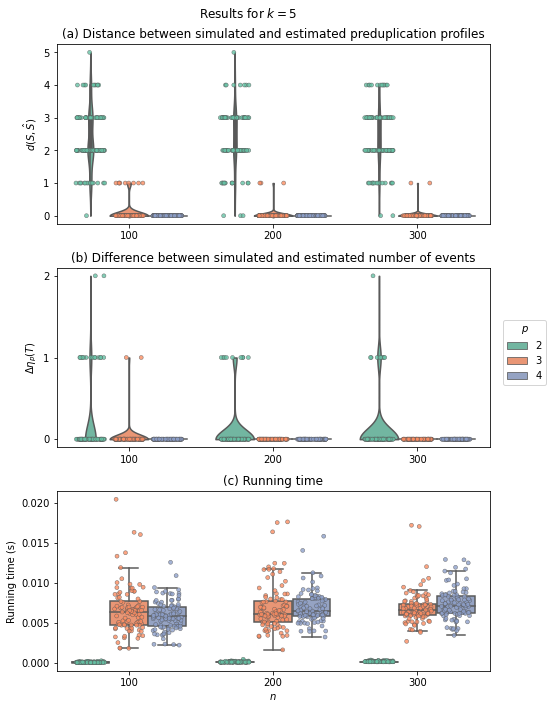

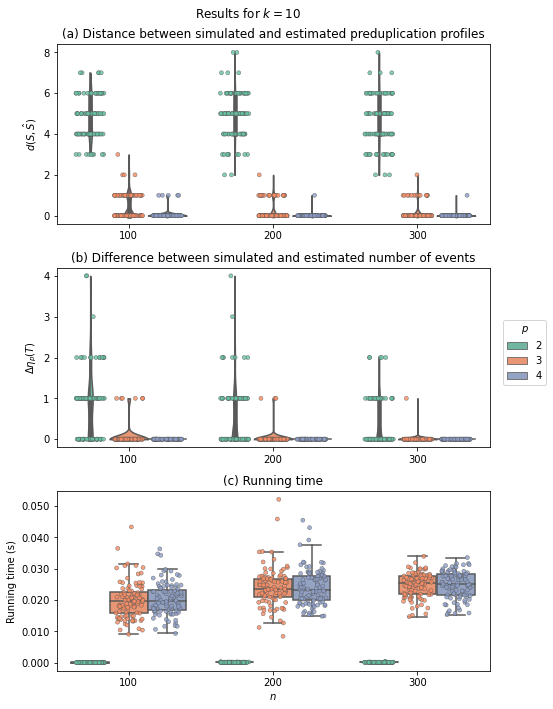

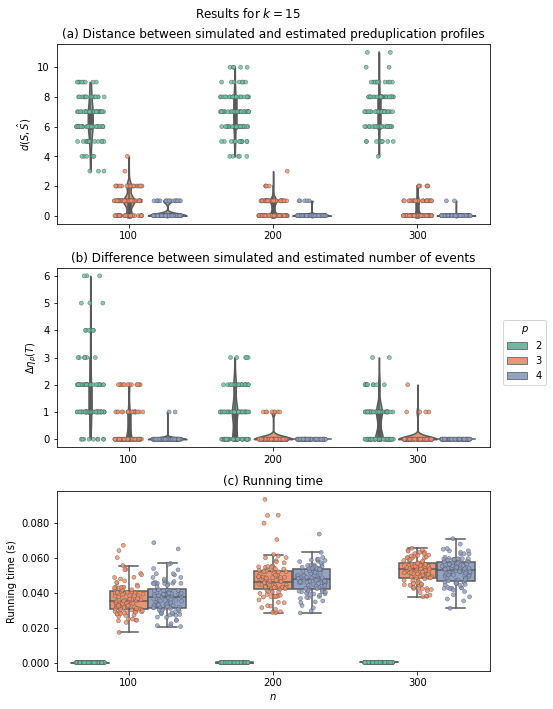

In [7]:

for K in [5,10, 15]:
    fig = plt.figure(figsize=(7,10))
    plt.suptitle('Results for $k = {}$'.format(K))
    plt.subplot(3,1,2)
    ax = sns.violinplot(data=df[df['k'] == K],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, cut=0)
#     ax = sns.boxplot(data=df[df['k'] == K],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, showfliers=False)
    ax = sns.stripplot(data=df[(df['k'] == K)],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, 
                       jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                       alpha=0.8)
    # sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
#     ax.set_xlabel('$n$')
    ax.set_xlabel(None)
    #ax.set_ylabel('$d(pS,T) - d(p\hat S,T)$')
    ax.set_ylabel('$\Delta \eta_p(T)$')
    ax.set_title('(b) Difference between simulated and estimated number of events')
    ax.get_legend().remove()#title='$p$')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.xaxis.set_visible(False)
    # _ = ax.set_yticks(range(5))

    plt.subplot(3,1,1)

    ax = sns.violinplot(data=df[df['k'] == K],x='n',y='d(S_,S)', hue='p', dodge=True, cut=0)
#     ax = sns.boxplot(data=df[df['k'] == K],x='n',y='d(S_,S)', hue='p', dodge=True, showfliers=False)
    ax = sns.stripplot(data=df[(df['k'] == K)],x='n',y='d(S_,S)', hue='p', dodge=True, 
                       jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                       alpha=0.8)
    # sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
#     ax.set_xlabel('$n$')
    ax.set_xlabel(None)
    ax.set_ylabel('$d(S, \hat S)$')
    ax.get_legend().remove()#title='$p$')
    ax.set_title('(a) Distance between simulated and estimated preduplication profiles')
#     ax.xaxis.set_visible(False)


    plt.subplot(3,1,3)
#     ax = sns.violinplot(data=df[df['k'] == K],x='n',y='n2_time', hue='p', dodge=True, cut=0)
    ax = sns.boxplot(data=df[df['k'] == K],x='n',y='n2_time', hue='p', dodge=True, showfliers=False)
    ax = sns.stripplot(data=df[df['k'] == K],x='n',y='n2_time',hue='p', 
                       size=4,edgecolor='gray',linewidth=0.5,
                       dodge=True, jitter=0.3, alpha=0.8)
    ax.set_ylabel('Running time (s)')
    ax.set_xlabel('$n$')
    ax.get_legend().remove()#title='$p$')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.set_title('(c) Running time')
    

    
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles[:3], labels[:3], 
               loc='right', 
               title='$p$',
               bbox_to_anchor=(1.1,0.5))
    plt.tight_layout()
    plt.savefig('k{}.pdf'.format(K), bbox_inches='tight')

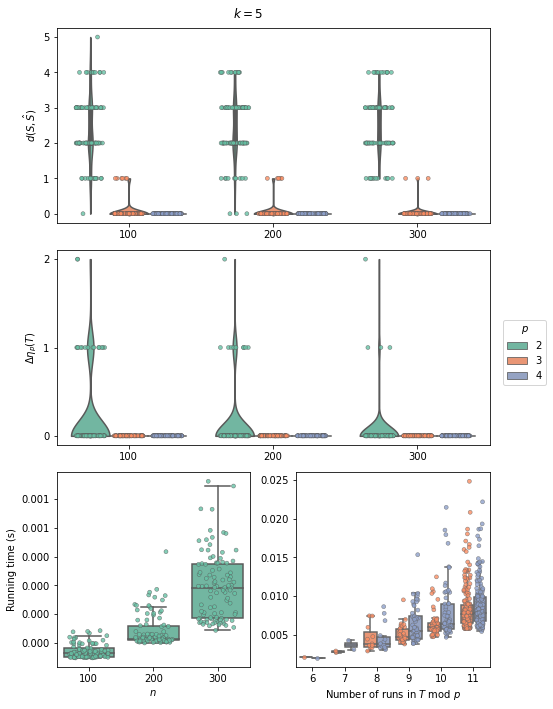

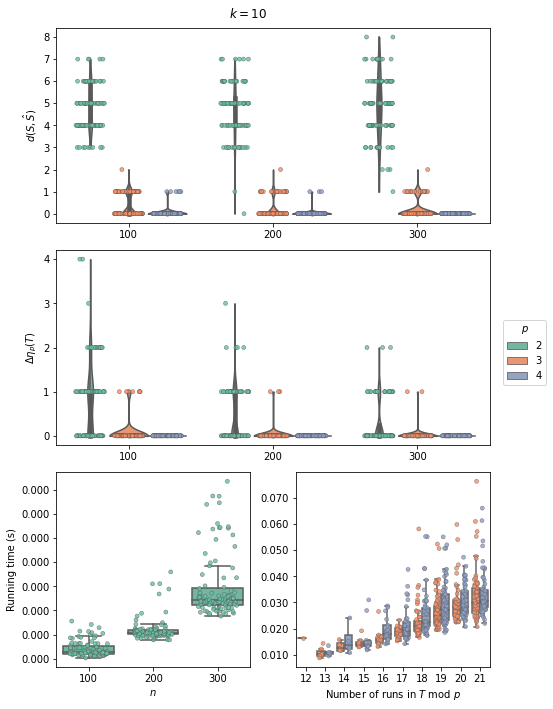

In [29]:

for K in [5,10]:
    fig = plt.figure(figsize=(7,10))
    plt.suptitle('$k = {}$'.format(K))
    plt.subplot(3,1,2)
    ax = sns.violinplot(data=df[df['k'] == K],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, cut=0)
#     ax = sns.boxplot(data=df[df['k'] == K],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, showfliers=False)
    ax = sns.stripplot(data=df[(df['k'] == K)],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, 
                       jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                       alpha=0.8)
    # sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
#     ax.set_xlabel('$n$')
    ax.set_xlabel(None)
    #ax.set_ylabel('$d(pS,T) - d(p\hat S,T)$')
    ax.set_ylabel('$\Delta \eta_p(T)$')
    ax.get_legend().remove()#title='$p$')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.xaxis.set_visible(False)
    # _ = ax.set_yticks(range(5))

    plt.subplot(3,1,1)

    ax = sns.violinplot(data=df[df['k'] == K],x='n',y='d(S_,S)', hue='p', dodge=True, cut=0)
#     ax = sns.boxplot(data=df[df['k'] == K],x='n',y='d(S_,S)', hue='p', dodge=True, showfliers=False)
    ax = sns.stripplot(data=df[(df['k'] == K)],x='n',y='d(S_,S)', hue='p', dodge=True, 
                       jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                       alpha=0.8)
    # sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
#     ax.set_xlabel('$n$')
    ax.set_xlabel(None)
    ax.set_ylabel('$d(S, \hat S)$')
    ax.get_legend().remove()#title='$p$')
#     ax.xaxis.set_visible(False)
    handles, labels = ax.get_legend_handles_labels()

    plt.subplot(3,2,5)
#     ax = sns.violinplot(data=df[df['k'] == K],x='n',y='n2_time', hue='p', dodge=True, cut=0)
    ax = sns.boxplot(data=df[(df['k'] == K) & (df['p'] == 2)],x='n',y='n2_time', hue='p', dodge=True, showfliers=False)
    ax = sns.stripplot(data=df[(df['k'] == K) & (df['p'] == 2)],x='n',y='n2_time',hue='p', 
                       size=4,edgecolor='gray',linewidth=0.5,
                       dodge=True, jitter=0.3, alpha=0.8)
    ax.set_ylabel('Running time (s)')
    ax.set_xlabel('$n$')
    ax.get_legend().remove()#title='$p$')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
    plt.subplot(3,2,6)
#     ax = sns.violinplot(data=df[df['k'] == K],x='n',y='n2_time', hue='p', dodge=True, cut=0)
    ax = sns.boxplot(data=df[(df['k'] == K) & (df['p'] > 2)],x='T_runs',y='n2_time', 
                     palette=sns.color_palette()[1:],
                     hue='p', dodge=True, showfliers=False)
    ax = sns.stripplot(data=df[(df['k'] == K) & (df['p'] > 2)],x='T_runs',y='n2_time',
                       palette=sns.color_palette()[1:],
                       hue='p', 
                       size=4,edgecolor='gray',linewidth=0.5,
                       dodge=True, jitter=0.2, alpha=0.8)
    ax.set_ylabel(None)
    ax.set_xlabel('Number of runs in $T$ mod $p$')
    ax.get_legend().remove()#title='$p$')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
    

    fig.legend(handles[:3], labels[:3], 
               loc='right', 
               title='$p$',
               bbox_to_anchor=(1.1,0.5))
    plt.tight_layout()
#     plt.savefig('k{}.pdf'.format(K), bbox_inches='tight')

In [19]:
sns.color_palette()[1:]

[(0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

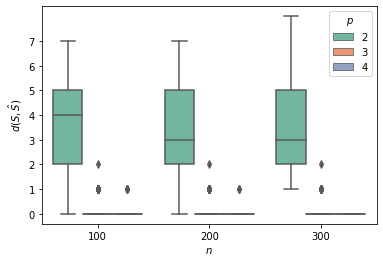

In [8]:
ax = sns.boxplot(data=df,x='n',y='d(S_,S)', hue='p',dodge=True)
ax.set_xlabel('$n$')
ax.set_ylabel('$d(S, \hat S)$')
ax.legend(title='$p$')
_ = ax.set_yticks(range(8))
# sns.stripplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True)

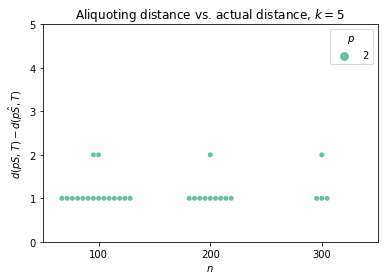

In [9]:
# ax = sns.violinplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, inner='box', cut=0)
# ax = sns.stripplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True)
# ax = sns.boxplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True)
ax = sns.swarmplot(data=df[(df['k'] == 5) & (df['d(pS,T) - d(pS_,T)'] > 0)],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True)
# sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$d(pS,T) - d(p\hat S, T)$')
ax.legend(title='$p$')
ax.set_title('Aliquoting distance vs. actual distance, $k = 5$')
_ = ax.set_yticks(range(6))


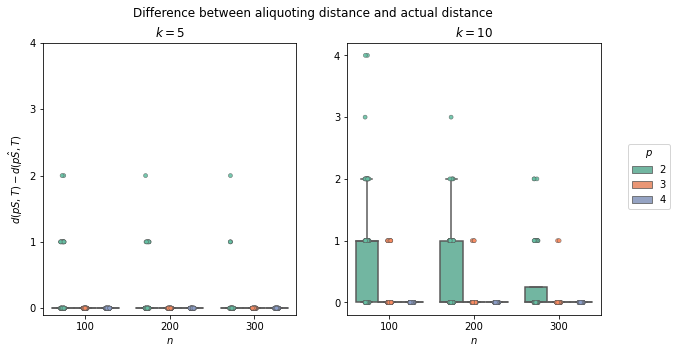

In [10]:
# ax = sns.violinplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, inner='box', cut=0)
# ax = sns.stripplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True)
fig = plt.figure(figsize=(10,5))
plt.suptitle('Difference between aliquoting distance and actual distance')
plt.subplot(1,2,2)
ax = sns.boxplot(data=df[df['k'] == 10],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, showfliers=False)
ax = sns.stripplot(data=df[(df['k'] == 10)],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, 
                   jitter=0.075, size=4,edgecolor='gray',linewidth=0.5,
                   alpha=0.9)
# sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel(None)
ax.get_legend().remove()#title='$p$')
ax.set_title('$k = 10$')
_ = ax.set_yticks(range(5))

plt.subplot(1,2,1)

ax = sns.boxplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, showfliers=False)
ax = sns.stripplot(data=df[(df['k'] == 5)],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, 
                   jitter=0.075, size=4,edgecolor='gray',linewidth=0.5,
                   alpha=0.9)
# sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$d(pS,T) - d(p\hat S, T)$')
ax.get_legend().remove()#title='$p$')
ax.set_title('$k = 5$')
_ = ax.set_yticks(range(5))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='right', title='$p$')


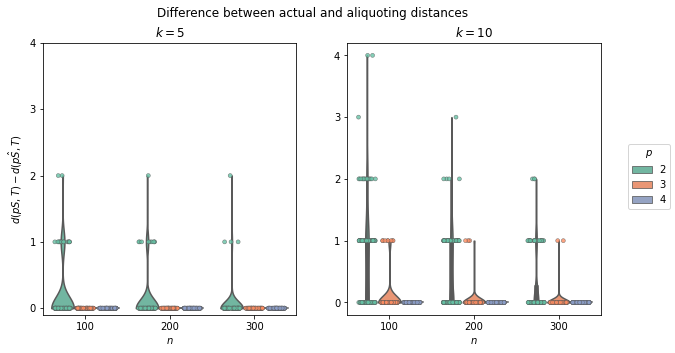

In [11]:
# ax = sns.violinplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, inner='box', cut=0)
# ax = sns.stripplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True)
fig = plt.figure(figsize=(10,5))
plt.suptitle('Difference between actual and aliquoting distances')
plt.subplot(1,2,2)
ax = sns.violinplot(data=df[df['k'] == 10],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, cut=0)
ax = sns.stripplot(data=df[(df['k'] == 10)],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, 
                   jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                   alpha=0.8)
# sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel(None)
ax.get_legend().remove()#title='$p$')
ax.set_title('$k = 10$')
_ = ax.set_yticks(range(5))

plt.subplot(1,2,1)

ax = sns.violinplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, cut=0)
ax = sns.stripplot(data=df[(df['k'] == 5)],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, 
                   jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                   alpha=0.8)
# sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$d(pS,T) - d(p\hat S, T)$')
ax.get_legend().remove()#title='$p$')
ax.set_title('$k = 5$')
_ = ax.set_yticks(range(5))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='right', title='$p$')
plt.savefig('distance_difference.pdf')

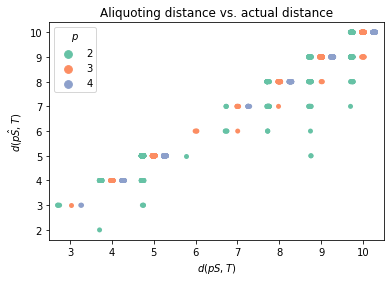

In [12]:
ax = sns.stripplot(data=df,x='d(pS,T)',y='d(pS_,T)',hue='p',dodge=True, jitter=1)
ax.set_ylabel('$d(p\hat S, T)$')
ax.set_xlabel('$d(pS,T)$')
ax.legend(title='$p$')
ax.set_title('Aliquoting distance vs. actual distance')
plt.savefig('aliquoting_vs_actual.pdf')

<AxesSubplot:xlabel='n', ylabel='d(S_,S)'>

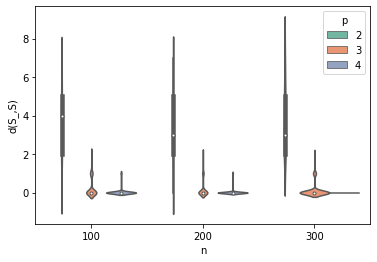

In [13]:
sns.violinplot(data=df,x='n',y='d(S_,S)',hue='p')

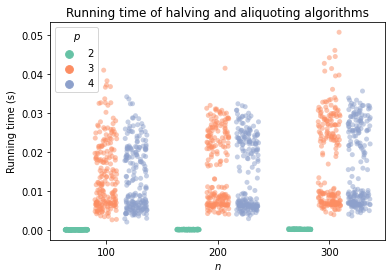

In [14]:
# sns.boxplot(data=df,x='n',y='n2_time',hue='p', dodge=True)
ax = sns.stripplot(data=df,x='n',y='n2_time',hue='p', dodge=True, jitter=0.3, alpha=0.5)
ax.set_ylabel('Running time (s)')
ax.set_xlabel('$n$')
_ = ax.legend(title='$p$')
ax.set_title('Running time of halving and aliquoting algorithms')
plt.savefig('runtime.pdf')

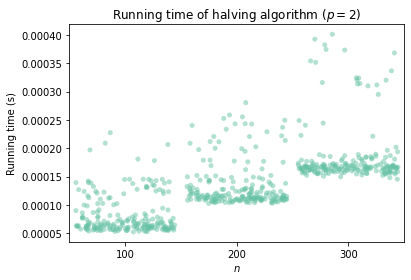

In [15]:
ax = sns.stripplot(data=df[df['p'] == 2],x='n',y='n2_time',hue='p', dodge=True, jitter=0.45, alpha=0.5)
# ax = sns.boxplot(data=df[df['p'] == 2],x='n',y='n2_time',hue='p', dodge=True,)
# sns.boxplot(data=df[df['p'] == 2],x='n',y='n2_time',hue='p', dodge=True,)
ax.get_legend().remove()
ax.set_ylabel('Running time (s)')
ax.set_xlabel('$n$')
ax.set_title('Running time of halving algorithm ($p=2$)')
plt.savefig('runtime_p2.pdf')

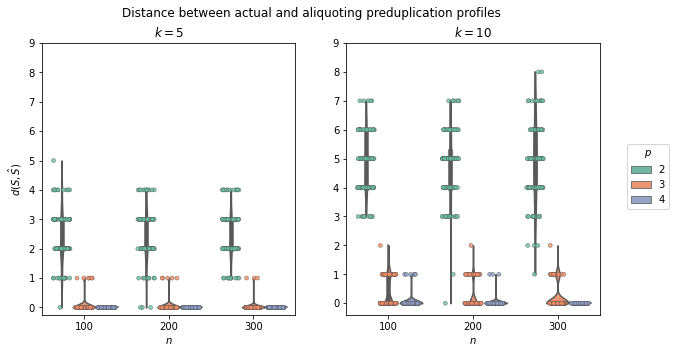

In [16]:
# ax = sns.violinplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True, inner='box', cut=0)
# ax = sns.stripplot(data=df[df['k'] == 5],x='n',y='d(pS,T) - d(pS_,T)', hue='p', dodge=True)
fig = plt.figure(figsize=(10,5))
plt.suptitle('Distance between actual and aliquoting preduplication profiles')
plt.subplot(1,2,2)
# ax = sns.boxplot(data=df[df['k'] == 10],x='n',y='d(S_,S)', hue='p', dodge=True, showfliers=False)
ax = sns.violinplot(data=df[df['k'] == 10],x='n',y='d(S_,S)', hue='p', dodge=True, cut=0)
ax = sns.stripplot(data=df[(df['k'] == 10)],x='n',y='d(S_,S)', hue='p', dodge=True, 
                   jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                   alpha=0.8)
# sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel(None)
ax.get_legend().remove()#title='$p$')
ax.set_title('$k = 10$')
_ = ax.set_yticks(range(10))

plt.subplot(1,2,1)

# ax = sns.boxplot(data=df[df['k'] == 5],x='n',y='d(S_,S)', hue='p', dodge=True, showfliers=False)
ax = sns.violinplot(data=df[df['k'] == 5],x='n',y='d(S_,S)', hue='p', dodge=True, cut=0)
ax = sns.stripplot(data=df[(df['k'] == 5)],x='n',y='d(S_,S)', hue='p', dodge=True, 
                   jitter=0.3, size=4,edgecolor='gray',linewidth=0.5,
                   alpha=0.8)
# sns.swarmplot(data=df,x='n',y='d(pS,T) - d(pS_,T)',hue='p',dodge=True,size=0.5)
ax.set_xlabel('$n$')
ax.set_ylabel('$d(S, \hat S)$')
ax.get_legend().remove()#title='$p$')
ax.set_title('$k = 5$')
_ = ax.set_yticks(range(10))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='right', title='$p$')
plt.savefig('preduplication_distance.pdf')